In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving despob_pob_actividad_ocupados_ipc_pib_2023.csv to despob_pob_actividad_ocupados_ipc_pib_2023 (1).csv
User uploaded file "despob_pob_actividad_ocupados_ipc_pib_2023 (1).csv" with length 14593 bytes


In [ ]:
import pandas as pd
import io
df_ = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=";")
df_.head()

cod_prov          nom_prov  porcen_desp  pob_tot  pob_hom  pob_muj  \
0         1       Araba/Álava           80   336686   165743   170943   
1         2          Albacete           73   387174   193676   193498   
2         3  Alicante/Alacant           44  1950357   963046   987311   
3         4           Almería           62   753920   385180   368740   
4         5             Ávila           94   158407    79551    78856   

   asexos_tactividad  asexos_templeo  asexos_tparo  hombres_tactividad  ...  \
0              58.33           54.36          6.80               64.94  ...   
1              59.00           51.98         11.88               66.18  ...   
2              58.41           50.70         13.22               63.68  ...   
3              61.16           51.44         15.87               67.63  ...   
4              53.84           47.52         11.72               60.37  ...   

   pib_prec  pib_agri  pib_indu  pib_ind_manu  pib_constr  pib_comer  \
0  12939983    201362   3832143       3473573      400677    1946392   
1   8663814    884324   1397006       1018831      465911    1559382   
2  37279735    547312   3627964       2916222     2556047    9851680   
3  15659622   2443690   1348695       1020119      723957    3793774   
4   3300110    141202    324441        251439      266759     645518   

   pib_act_fin  pib_admin  pib_valor_brut  pib_imp_netos  
0      2434844    2891885        11707303        1232680  
1      1440261    2091603         7838487         825327  
2      8929332    8216082        33728417        3551318  
3      2816431    3041318        14167865        1491757  
4       678479     929338         2985737         314373  

[5 rows x 41 columns]

In [ ]:
df_.drop(['cod_prov', 'nom_prov'], axis=1, inplace=True)

In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
# Luego de la primera prueba con todas las columnas saco estos
#df.drop(['asexos_templeo', 'hombres_tactividad', 'mujeres_tactividad', 'ipc_alim', 'ipc_bebi', 'ipc_vest', 'ipc_hoga', 'ipc_trans', 'ipc_comu', 'ipc_ense', 'ipc_resta'], axis=1, inplace=True)
#df.drop(['ipc_otros', 'pib_indu', 'pib_ind_manu', 'pib_admin', 'pib_valor_brut'], axis=1, inplace=True)

# Para la tercera prueba saco estos
#df.drop(['asexos_tactividad', 'hombres_templeo', 'mujeres_templeo', 'mujeres_tparo', 'ipc_ocio', 'pib_agri'], axis=1, inplace=True)

# para la cuarta prueba saco
#df.drop(['pob_tot', 'pob_hom', 'pob_muj'], axis=1, inplace=True)

# para la quinta prueba saco
#df.drop(['ocupados_agricultura', 'pib_comer', 'pib_imp_netos'], axis=1, inplace=True)

# para la sexta prueba saco
#df.drop(['ocupados_construccion'], axis=1, inplace=True)

# para la septima prueba saco
#df.drop(['ocupados_industria', 'asexos_tparo'], axis=1, inplace=True)

# para la octava prueba saco
#df.drop(['ipc_sani', 'pib_prec'], axis=1, inplace=True)

# para la novena prueba saco
df.drop(['ocupados_servicios', 'hombres_tparo'], axis=1, inplace=True)

In [ ]:
#df = df_.copy()
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33)
display_side_by_side(train.tail(),test.head())

porcen_desp 
 ipc_vivi 
 pib_constr 
 pib_act_fin 
 
 
 
 
 24 
 83 
 107.07 
 641829 
 2360633 
 
 
 4 
 94 
 109.17 
 266759 
 678479 
 
 
 49 
 88 
 104.17 
 1284516 
 5652200 
 
 
 19 
 48 
 101.88 
 1186543 
 4743611 
 
 
 37 
 11 
 102.35 
 1120681 
 4819924 
 
 
 
 
 
 
 porcen_desp 
 ipc_vivi 
 pib_constr 
 pib_act_fin 
 
 
 
 
 32 
 50 
 104.18 
 1392272 
 5075288 
 
 
 30 
 77 
 107.56 
 1046069 
 3620392 
 
 
 18 
 93 
 104.36 
 256396 
 1101430 
 
 
 11 
 77 
 101.82 
 758542 
 2748923 
 
 
 43 
 95 
 106.21 
 235976 
 551729

#1. Parametrización


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

El regresor

In [ ]:
regressor = RandomForestRegressor()
regressor

RandomForestRegressor()

## GridSearch

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['sqrt'], # Number of features to consider at every split       # "max_features": ['auto', 'sqrt']
              "max_depth": [8,4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [ ]:
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = 5)

grid_regres.fit(X = train.drop(['porcen_desp'], axis=1),
                           y = train['porcen_desp'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 4, 2],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [32, 64, 128]})

In [ ]:
report(grid_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.152 (std: 0.139)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 32}

Model with rank: 2
Mean validation score: 0.116 (std: 0.159)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 128}

Model with rank: 3
Mean validation score: 0.112 (std: 0.145)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 128}

Model with rank: 4
Mean validation score: 0.112 (std: 0.129)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 32}

Model with rank: 5
Mean validation score: 0.111 (std: 0.138)
Parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators'

In [ ]:
grid_regres.best_estimator_

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=8,
                      n_estimators=32)

In [ ]:
best_grid = grid_regres.best_estimator_

best_grid.fit( X = train.drop(['porcen_desp'], axis=1), y = train['porcen_desp'])
y_pred = best_grid.predict(X = test.drop(['porcen_desp'], axis = 1))

from sklearn.metrics import mean_absolute_error
import numpy as np
actual = np.array(test['porcen_desp'])
prediction = np.array(y_pred)
mae = mean_absolute_error(test['porcen_desp'], y_pred)
print ('MAE', mae)

MAE 19.760306159250334


In [ ]:
columns = list(df.columns.values)
columns.remove('porcen_desp')
print ('Feature Relevancies')
pd.DataFrame({'Attributes': columns, 'Decision Tree': best_grid.feature_importances_})

Feature Relevancies


Attributes  Decision Tree
0     ipc_vivi        0.15625
1   pib_constr        0.25000
2  pib_act_fin        0.59375

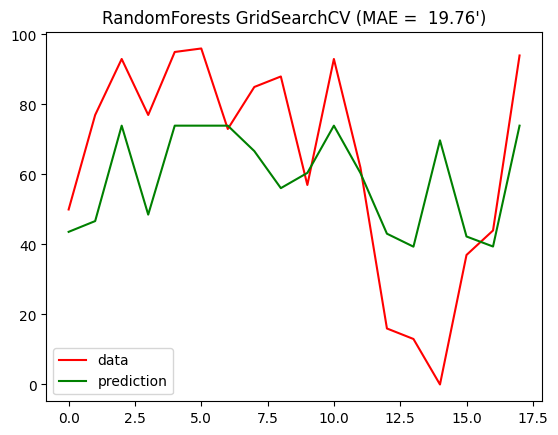

In [ ]:
from sklearn.metrics import mean_absolute_error

import numpy as np
xx = np.stack(list(i for i in range(test['porcen_desp'].shape[0])))
plt.plot(xx, test['porcen_desp'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()